<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
# ! pip install --quiet vietocr

In [2]:
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [3]:
# ! pip install PyYAML

# Inference

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
config = Cfg.load_config_from_name('vgg_transformer')

In [6]:
import torch, torchvision, torchaudio

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [7]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(config['device'])

cuda:0


In [8]:
detector = Predictor(config)

d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight C:\Users\TAMNGO~1\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [9]:
# # ! wget https://vocr.vn/data/vietocr/sample.zip
# # ! unzip  -qq -o sample.zip
# import requests
# import zipfile
# import io

# # Download the ZIP file
# url = "https://vocr.vn/data/vietocr/sample.zip"
# response = requests.get(url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Extract the contents of the ZIP file
#     with zipfile.ZipFile(io.BytesIO(response.content), "r") as zip_ref:
#         zip_ref.extractall(".")
# else:
#     print("Failed to download the ZIP file.")


In [10]:
# ! ls sample | shuf |head -n 5
import os

# List files in the 'sample' directory
files = os.listdir("sample")

# Shuffle the list of files
# import random
# random.shuffle(files)

# Select the first 5 files
selected_files = files[:5]

# Print the selected files
print(selected_files)


['00019816.jpg', '001063014772.jpeg', '001085019081.jpeg', '001195005971.jpeg', '026087002892.jpeg']


d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


'VŨ THUỲ NINH'

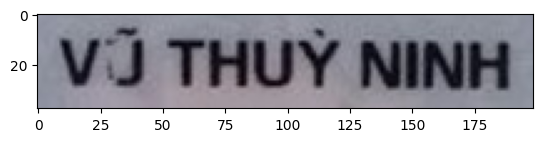

In [11]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [12]:
# # ! wget https://vocr.vn/data/vietocr/data_line.zip
# # ! unzip -qq -o ./data_line.zip
# import requests
# import zipfile
# import io

# # Download the ZIP file
# url = "https://vocr.vn/data/vietocr/data_line.zip"
# response = requests.get(url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Extract the contents of the ZIP file
#     with zipfile.ZipFile(io.BytesIO(response.content), "r") as zip_ref:
#         zip_ref.extractall(".")
# else:
#     print("Failed to download the ZIP file.")


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [13]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [14]:
config = Cfg.load_config_from_name('vgg_transformer')

In [15]:

dataset_params = {
    'name': 'hw',
    'data_root': './data_line/',
    'train_annotation': 'train_line_annotation.txt',
    'valid_annotation': 'test_line_annotation.txt'
}
params = {
    'print_every': 200,
    'valid_every': 15*200,
    'iters': 20000,
    'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    'metrics': 10000
}

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = "cuda:0"
config['dataloader']['num_workers'] = 0

you can change any of these params in this full list below

In [17]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained 

In [18]:
trainer = Trainer(config, pretrained=True)

d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is Tru

Model weight C:\Users\TAMNGO~1\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 130187.38it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 143219.37it/s]


Save model configuration for inference, load_config_from_file

In [19]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [20]:
# ! pip uninstall numpy

In [21]:
# ! pip install numpy==1.23.1

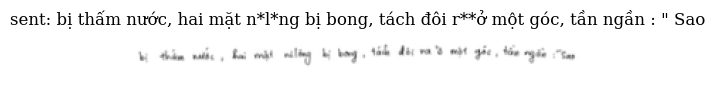

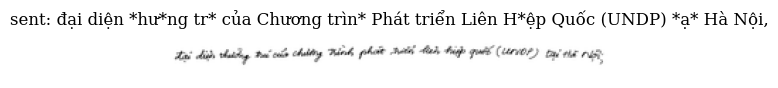

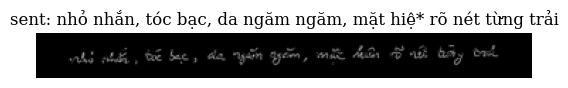

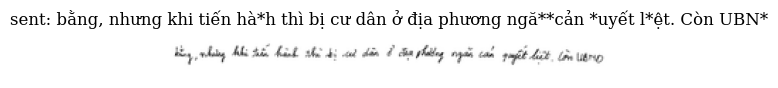

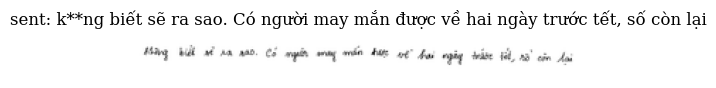

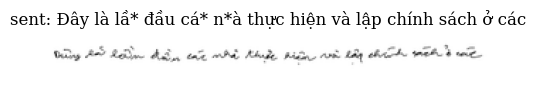

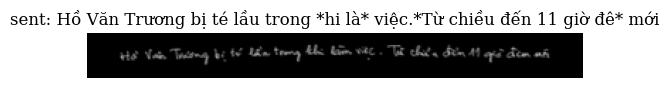

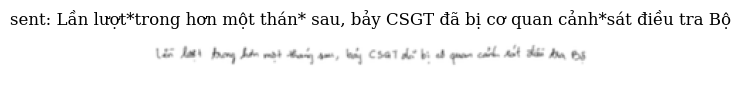

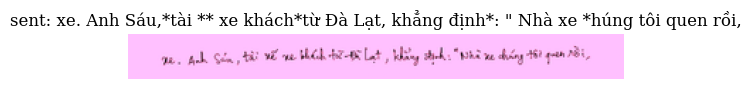

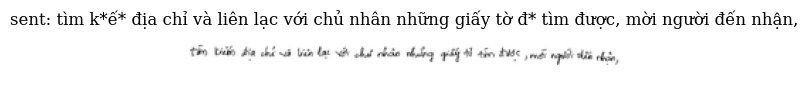

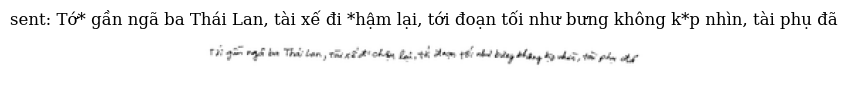

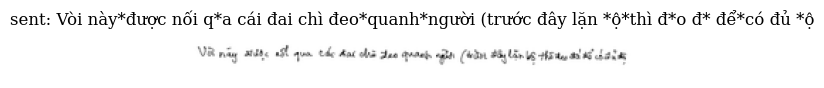

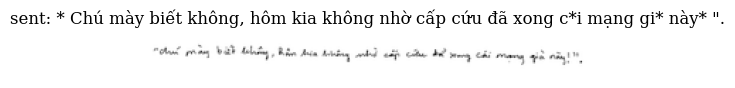

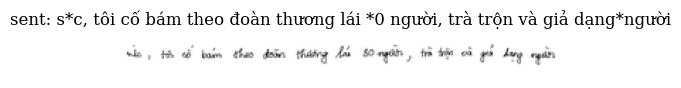

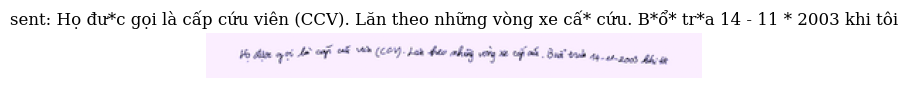

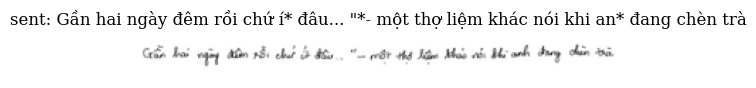

In [22]:
trainer.visualize_dataset()

Train now

In [23]:
trainer.train()

d:\AIRC\AIRC_Product\Test_Code\vietocr\.venv\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


iter: 000200 - train loss: 1.601 - lr: 1.91e-05 - load time: 21.22 - gpu time: 71.73
iter: 000400 - train loss: 1.352 - lr: 3.95e-05 - load time: 19.01 - gpu time: 71.66
iter: 000600 - train loss: 1.239 - lr: 7.14e-05 - load time: 20.27 - gpu time: 71.76
iter: 000800 - train loss: 1.158 - lr: 1.12e-04 - load time: 17.91 - gpu time: 71.46
iter: 001000 - train loss: 1.090 - lr: 1.56e-04 - load time: 18.49 - gpu time: 68.72
iter: 001200 - train loss: 1.057 - lr: 2.01e-04 - load time: 19.58 - gpu time: 72.01
iter: 001400 - train loss: 1.017 - lr: 2.41e-04 - load time: 19.40 - gpu time: 71.82
iter: 001600 - train loss: 0.982 - lr: 2.73e-04 - load time: 19.14 - gpu time: 71.81
iter: 001800 - train loss: 0.956 - lr: 2.93e-04 - load time: 20.03 - gpu time: 71.90
iter: 002000 - train loss: 0.938 - lr: 3.00e-04 - load time: 18.21 - gpu time: 72.36


Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()